# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Árboles de Decisión</center>
### <center> Práctica Árboles de Clasificación </center>

#### Links interesantes
 * https://pandas.pydata.org
 * https://scikit-learn.org
 * https://matplotlib.org/
 * https://seaborn.pydata.org/
 * https://towardsdatascience.com/beautiful-decision-tree-visualizations-with-dtreeviz-af1a66c1c180
 * https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler
 * https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning
 * https://towardsdatascience.com/decision-tree-classifier-and-cost-computation-pruning-using-python-b93a0985ea77

### Importamos todas las librerías que vamos a necesitar

In [ ]:
!pip install 'dtreeviz'

In [ ]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Cargamos el dataset sobre el cual vamos a trabajar

In [ ]:
ds_titanic=pd.read_csv('./datasets/ds_titanic.csv')
ds_trabajo=ds_titanic.copy()

### Análisis exploratorio

Listar la cantidad de filas y columnas que tiene el dataset

In [ ]:
ds_trabajo.shape

(891, 12)

Este dataset contiene 891 filas y 12 columnas

Listar los nombres de las columnas del dataset

In [ ]:
ds_trabajo.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<b>Descripción de los campos</b><br>
* PassengerId: Identificador del pasajero dentro de la tabla<br>
* Survived: Indica si el pasajero sobrevivió<br>
* Pclass: clase de pasajero primera(1), segunda (2) o tercera (3) <br>
* Name: Nombre del pasajero <br>
* Sex: Sexo del pasajero<br>
* Age: Edad<br>
* SibSp: Cantidad de hermanas/os o esposas/os a bordo<br>
* Parch: Cantidad de padres o hijos a bordo<br>
* Ticket: Número de ticket<br>
* Fare: Tarifa <br>
* Cabin: Cabina en la cual se encuentra alojado el pasajero<br>
* Embarked: Puerta de embarque<br>

Mostrar algunas filas del dataframe

In [ ]:
ds_trabajo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



<font color='red'>TODO (tarea): </font>
<font color='red'> Un an&aacute;lisis exploratorio de este dataset lo realizamos en clases anteriores, ahora te proponemos continuar esta tarea </font>    

### Preprocesamiento

#### Selección de atributos

Eliminamos algunas columnas que decidimos no utilizar

In [ ]:
columnas_eliminar=['PassengerId','Name',"Ticket"]
ds_trabajo.drop(columnas_eliminar, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
ds_trabajo.columns.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

#### Datos nulos

Anlizamos la proporcion de datos nulos de cada atributo

In [ ]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


<font color='blue'>Por esta vez vamos eliminar los valores faltantes. </font><br>
* Debido a la gran cantidad de datos nulos en la variable Cabin se decide eliminarla.<br>
* Para el resto de las variables con datos faltantes se eliminaran las filas que tengan valores nulos en alguna de ellas.

In [ ]:
columnas_eliminar_NANs=['Cabin']
ds_trabajo.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
ds_trabajo.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [ ]:
ds_trabajo=ds_trabajo.dropna()
ds_trabajo_limpio=ds_trabajo.copy()

Volvemos a listar la cantidad de Nans

In [ ]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64


In [ ]:
ds_trabajo.shape

(712, 8)

<font color='red'>TODO (tarea): </font>
<font color='red'> probar dejando Nans en el dataset  </font>    

### Entrenamiento y Predicción

Continuamos trabajando con un dataset de 712 filas y 8 variables

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo.drop(['Survived'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo['Survived'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [ ]:
#Creo un clasificador
tree_model = tree.DecisionTreeClassifier(max_depth = 10)

#Entreno el modelo
model = tree_model.fit(X = x_train, y = y_train) 

ValueError: ignored

<font color='blue'> Muchas veces para trabajar con determinados m&eacute;todos es necesario realizar transformaciones de variables.</font>
<font color='blue'> En este caso al utilizar esta implementaci&oacute;n de &aacute;rboles, y querer utilizar variables categ&oacute;ricas como variables predictoras, necesitamos realizar transformaciones sobre las mismas. </font>
<font color='blue'> </font>

In [ ]:
#One hot encoding para variables categoricas
ds_trabajo = pd.get_dummies(ds_trabajo, columns=["Pclass","Sex","Embarked"], drop_first=True)
ds_trabajo.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


#### Divisi&oacute;n Train - Test nuevamente

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo.drop(['Survived'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo['Survived'].copy()

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, 
                                                    ds_trabajo_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [ ]:
x_train.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
52,49.0,1,0,76.7292,0,0,0,0,0
366,60.0,1,0,75.2500,0,0,0,0,0
802,11.0,1,2,120.0000,0,0,1,0,1
184,4.0,0,2,22.0250,0,1,0,0,1
71,16.0,5,2,46.9000,0,1,0,0,1


In [ ]:
y_train.head()

52     1
366    1
802    1
184    1
71     0
Name: Survived, dtype: int64

Elegimos una cantidad de max_depth para probar

In [ ]:
#Creamos un clasificador con hiperparámetros 
tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 20, 
                                         min_samples_leaf=10) 
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

<font color='red'>TODO (tarea): </font>
<font color='red'> probar con criterion="gini"  </font>    

In [ ]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#Valores Reales
y_test.values

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

,test,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


In [ ]:
tabla

array([[104,  26],
       [ 22,  62]])

Text(33.0, 0.5, 'True')

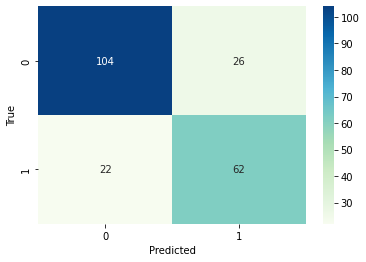

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.7757009345794392
Recall: 0.7380952380952381
f1 score: 0.7209302325581395


#### Graficamos el árbol

In [ ]:
model.classes_

array([0, 1])

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model,
                                 feature_names=ds_trabajo_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=['Not Survived','Survived']) #model.classes_
plt.show(tree_plot_completo)

Output hidden; open in https://colab.research.google.com to view.

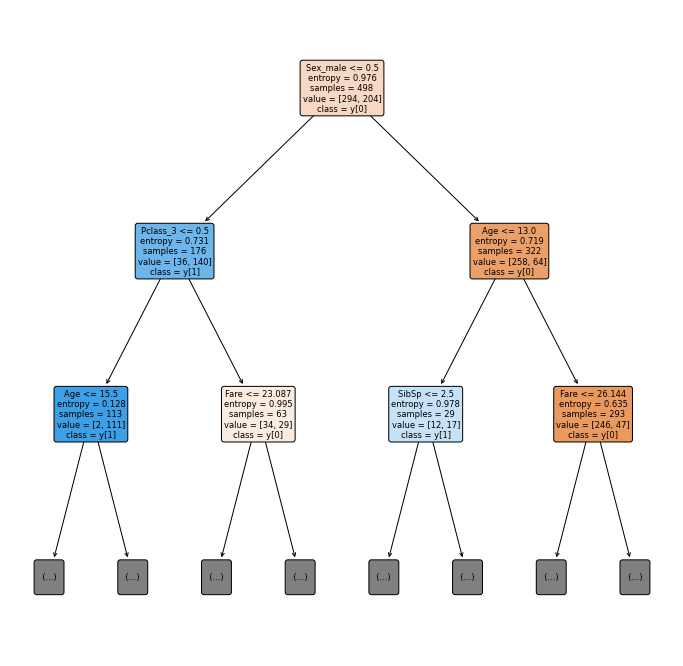

In [ ]:
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_trabajo_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

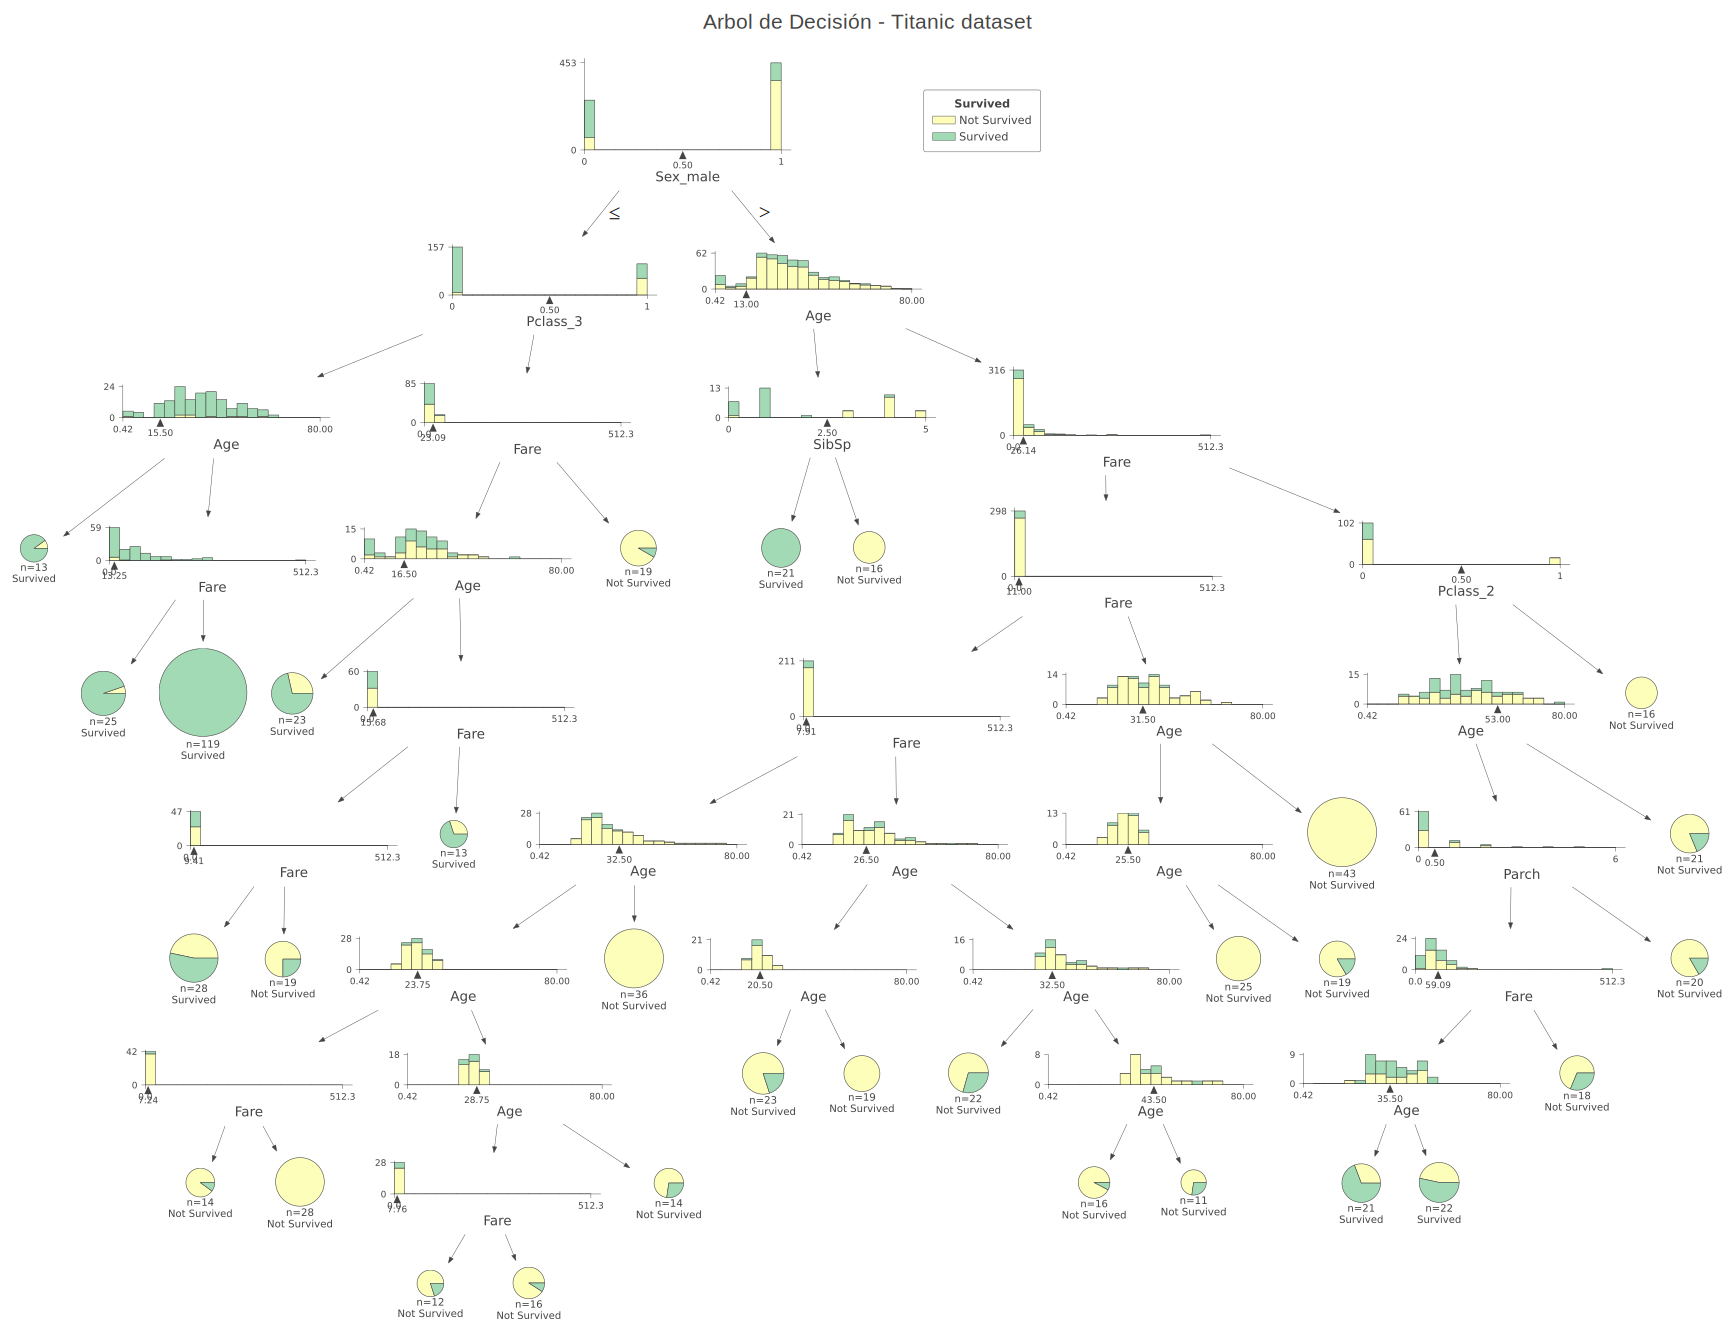

In [ ]:
viz = dtreeviz.dtreeviz(
    model,
    ds_trabajo_x,
    ds_trabajo_y,
    class_names=['Not Survived','Survived'], 
    title="Arbol de Decisión - Titanic dataset",
    target_name='Survived',
    feature_names=ds_trabajo_x.columns.to_list(),
    scale=1.5
)

display(viz)

#### Importancia de atributos

La documentación dice:

feature importances : ndarray of shape (nfeatures,)<br>
The higher, the more important the feature. <br>
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. <br>
It is also known as the Gini importance.<br>

feature importances : ndarray of shape (nfeatures,)<br>
Cuanto más alto, más importante es la característica.<br>
La importancia de una característica se calcula como la reducción total (normalizada) del criterio aportado por esa característica.<br>
También se conoce como la importancia de Gini.<br>

In [ ]:
sorted(list(zip(ds_trabajo_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('Sex_male', 0.42649114482918926),
 ('Pclass_3', 0.1742183217105572),
 ('Age', 0.13486571507699371),
 ('Fare', 0.13379300394717564),
 ('SibSp', 0.09612084905871837),
 ('Pclass_2', 0.023086547938698895),
 ('Parch', 0.01142441743866702),
 ('Embarked_Q', 0.0),
 ('Embarked_S', 0.0)]

#### Poda


A medida que aumenta el alfa, se poda una mayor parte del árbol, lo que aumenta la impureza total de sus hojas.

In [ ]:
#Creo un clasificador 
arbol_poda = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 20, 
                                         min_samples_leaf=10, 
                                         ccp_alpha=0.01)
#Entreno un modelo
model_poda = arbol_poda.fit(X = x_train, y = y_train)

#Hago una predicción
y_pred_poda = model_poda.predict(x_test)

#Visualizo los resultados en un dataframe
ds_resultados_poda=pd.DataFrame(zip(y_test,y_pred_poda),columns=['test','pred'])
ds_resultados_poda.head()

,test,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


Text(33.0, 0.5, 'True')

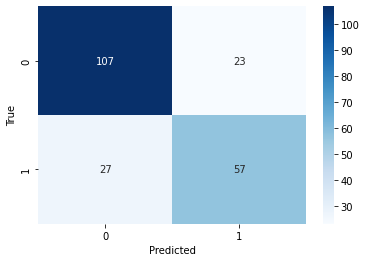

In [ ]:
#Creo matriz de confusión
tabla=confusion_matrix(y_test,y_pred_poda)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
#Evaluo la performance en el conjunto de evaluación
accuracy_poda=accuracy_score(y_test,y_pred_poda)
recall_poda=recall_score(y_test,y_pred_poda)
f1_poda=f1_score(y_test,y_pred_poda)

print("Accuracy: "+str(accuracy_poda))
print("Recall: "+str(recall_poda))
print("f1 score: "+str(f1_poda))

Accuracy: 0.7663551401869159
Recall: 0.6785714285714286
f1 score: 0.6951219512195121


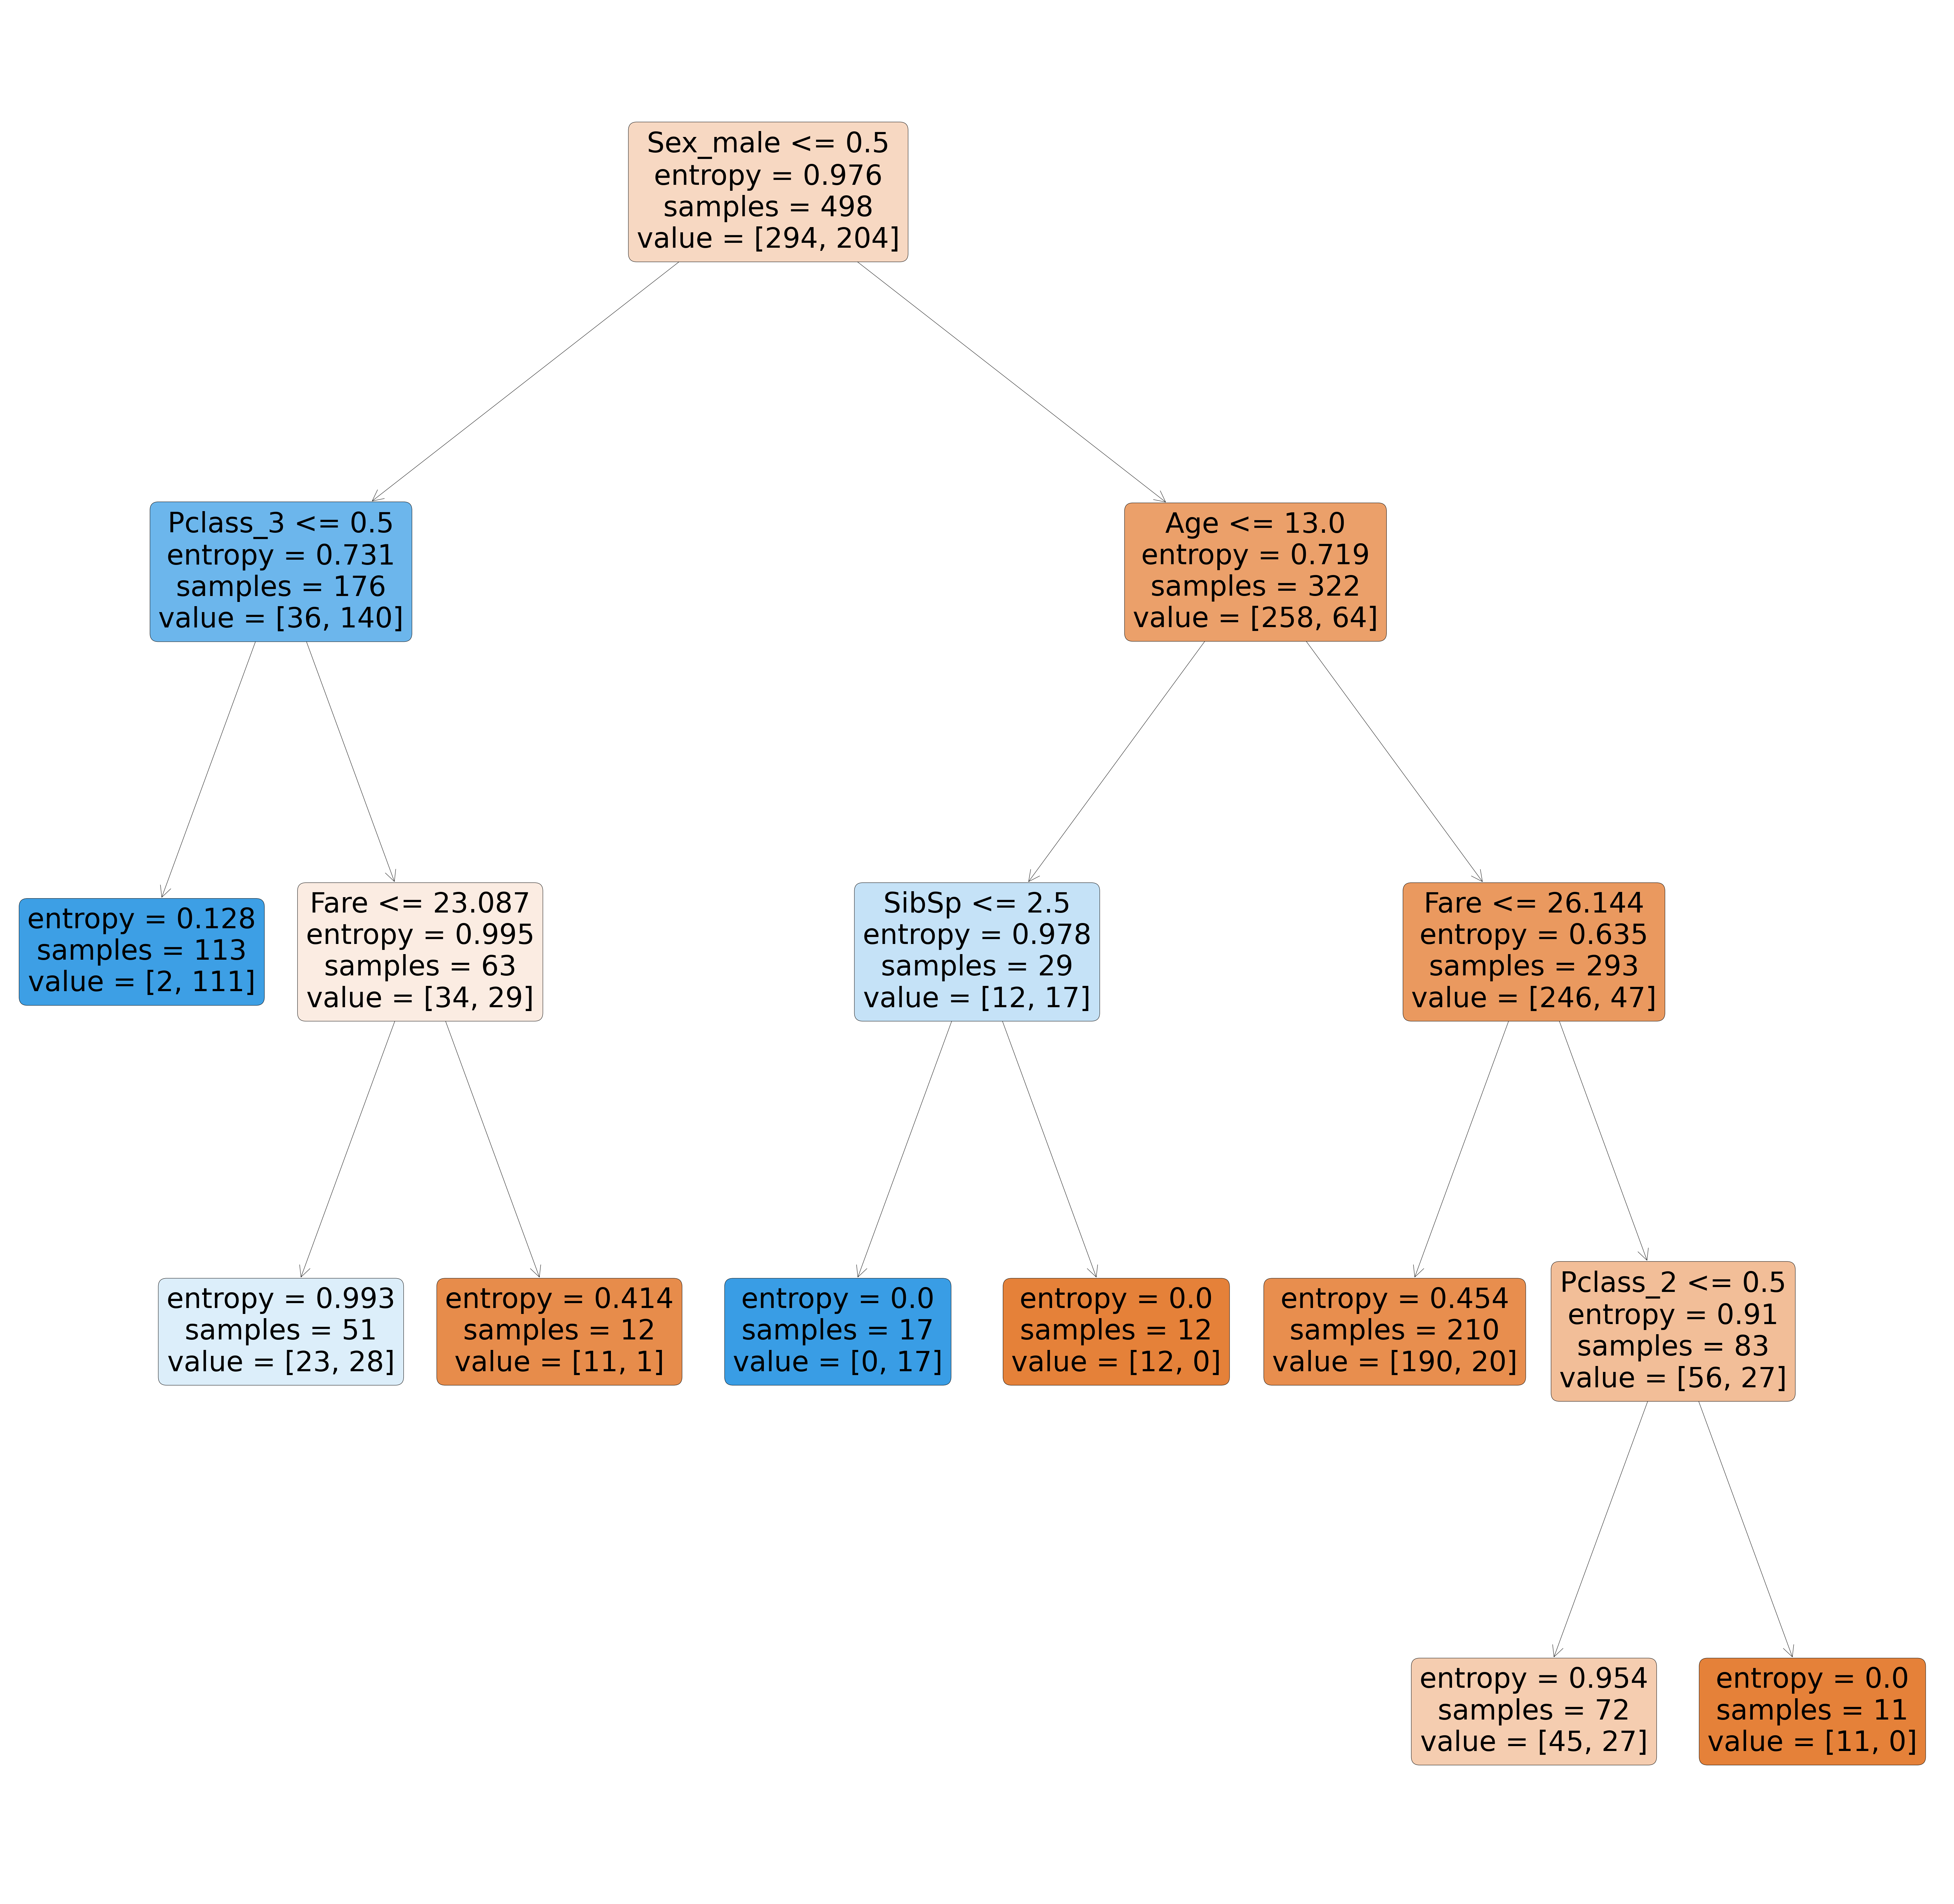

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model_poda,
                                 feature_names=ds_trabajo_x.columns.to_list(),
                                 filled=True,
                                 rounded=True)
plt.show(tree_plot_completo)

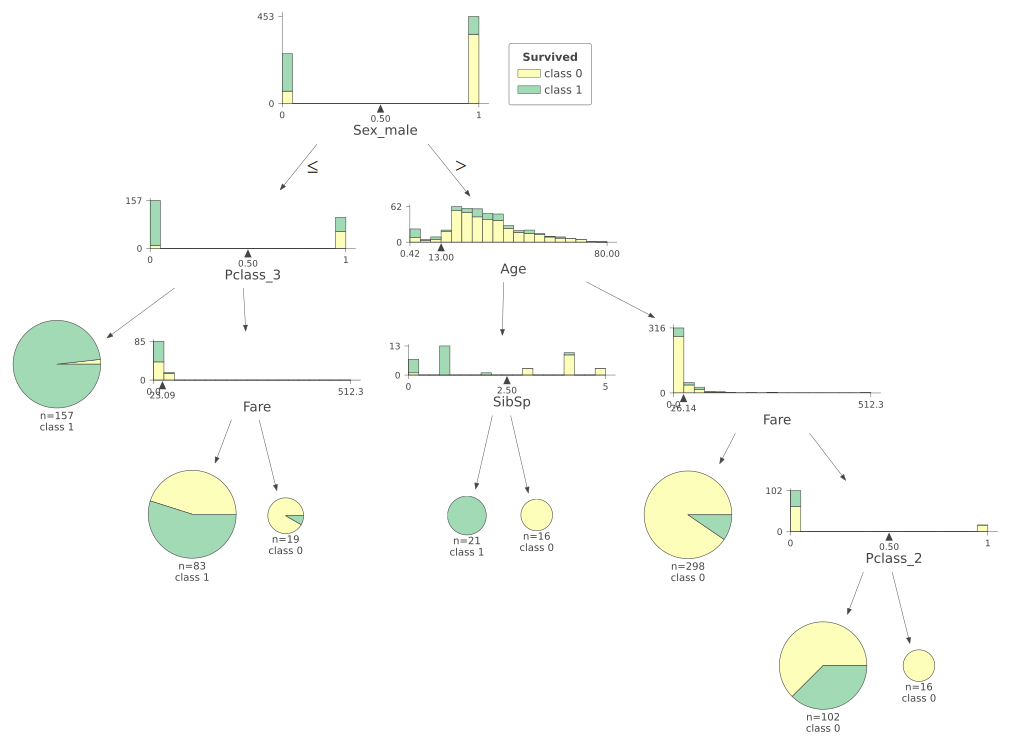

In [ ]:
viz = dtreeviz.dtreeviz(
    model_poda,
    ds_trabajo_x,
    ds_trabajo_y,
    target_name='Survived',
    feature_names=ds_trabajo_x.columns.to_list(),
    scale=1.5
)

display(viz)

### Feature Engineering

Vamos realizar un escalado min max de la variable age para ver que impacto tiene en el modelo

In [ ]:
ds_trabajo_fe=ds_trabajo.copy()
ds_trabajo_fe = pd.get_dummies(ds_trabajo_fe, columns=["Pclass","Sex","Embarked"], drop_first=True)

In [ ]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_fe_x=ds_trabajo_fe.drop(['Survived'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_fe_y = ds_trabajo_fe['Survived'].copy()

#Genero los conjuntos de train y test
x_fe_train, x_fe_test, y_fe_train, y_fe_test = train_test_split(ds_trabajo_fe_x, 
                                                                ds_trabajo_fe_y, 
                                                                test_size=0.3,  #proporcion 70/30
                                                                random_state=2) #semilla

In [ ]:
#Creo un "escalador"
scaler = MinMaxScaler() 

#Ajusto el "escalador" a la variable age
scaler.fit(pd.DataFrame(x_fe_train['Age']))

print(scaler.data_max_)
print(scaler.data_min_)

[80.]
[0.42]


In [ ]:
sorted(ds_trabajo_fe.Age)[0:20]

[0.42,
 0.67,
 0.75,
 0.75,
 0.83,
 0.83,
 0.92,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0]

In [ ]:
#Escalo la variable Age en el set de entrenamiento
x_fe_train['Age']=scaler.transform(x_fe_train['Age'].to_frame())

#Escalo la variable Age en el set de test
x_fe_test['Age']=scaler.transform(x_fe_test['Age'].to_frame())

In [ ]:
x_fe_train['Age']

52     0.610455
366    0.748681
802    0.132948
184    0.044986
71     0.195778
         ...   
677    0.220910
735    0.352852
625    0.761247
668    0.535059
211    0.434531
Name: Age, Length: 498, dtype: float64

<font color='red'>TODO (tarea): </font>
<font color='red'> Investigar sklearn.pipeline </font>    

In [ ]:
#Creo un clasificador
tree_model_fe = tree.DecisionTreeClassifier(criterion="entropy",
                                            max_depth = 20, 
                                            min_samples_leaf=10, 
                                            ccp_alpha=0.01)
#Entreno un modelo
model_fe = tree_model_fe.fit(X = x_fe_train, y = y_fe_train)

#Hago una prediccion
y_pred_fe = model_fe.predict(x_fe_test)

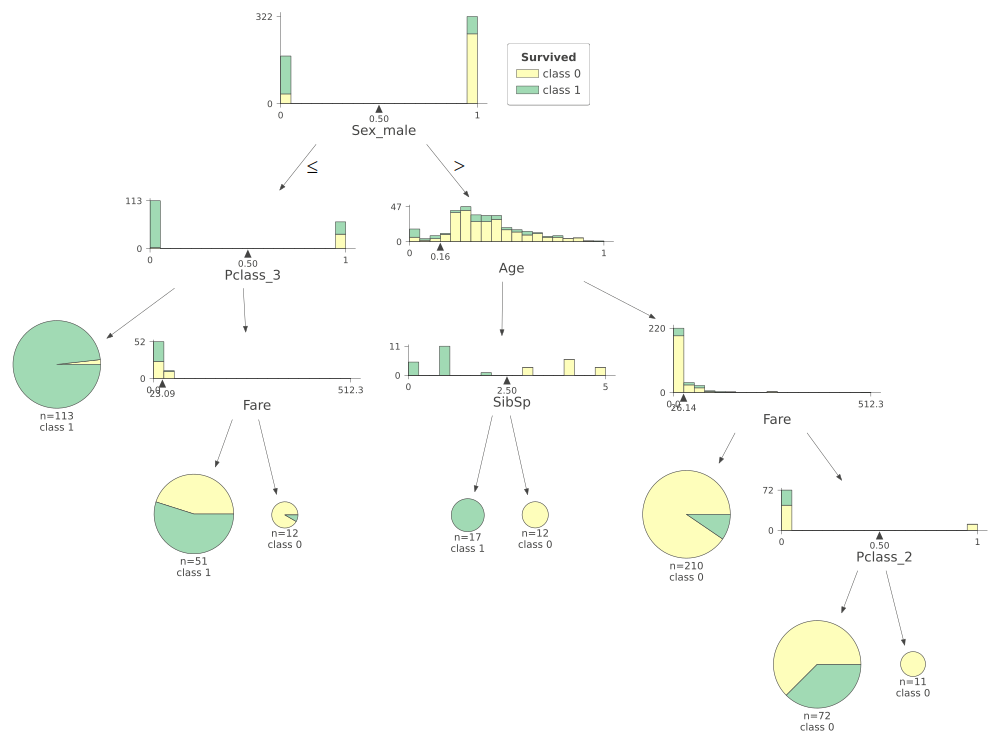

In [ ]:
#Graficamos el arbol
viz = dtreeviz.dtreeviz(
    model_fe,
    x_fe_train,
    y_fe_train,
    target_name='Survived',
    feature_names=ds_trabajo_x.columns.to_list(),
    scale=1.5
)

display(viz)

In [ ]:
#Evaluamos la performance en el conjunto de evaluación
accuracy_fe=accuracy_score(y_test, y_pred_fe)

recall_fe=recall_score(y_test, y_pred_fe )

f1_fe=f1_score(y_test, y_pred_fe)

print("Accuracy: "+str(accuracy_fe))
print("Recall: "+str(recall_fe))
print("f1 score: "+str(f1_fe))

Accuracy: 0.7663551401869159
Recall: 0.6785714285714286
f1 score: 0.6951219512195121
